In [29]:
import numpy as np
import pandas as pd
# from sklearn import cluster
# from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
x = np.array([
    [3.5, 1], 
    [4.5, 1.5], 
    [2.5, 2], 
    [1, 2.5], 
    [2.5, 3], 
    [3.5, 3], 
    [5.5, 3.5], 
    [4.5, 4], 
    [6.5, 4], 
    [5.5, 4.5]
])

y = np.array([0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

In [3]:
# X, y = make_blobs(n_samples=10,
#                   centers=3,
#                   n_features=2,
#                   random_state=23)

In [4]:
x

array([[3.5, 1. ],
       [4.5, 1.5],
       [2.5, 2. ],
       [1. , 2.5],
       [2.5, 3. ],
       [3.5, 3. ],
       [5.5, 3.5],
       [4.5, 4. ],
       [6.5, 4. ],
       [5.5, 4.5]])

In [5]:
y

array([0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

In [6]:
data = pd.DataFrame(x, columns=["x1", "x2"])
data["y"] = y
data["y"] = data.y.astype('category')

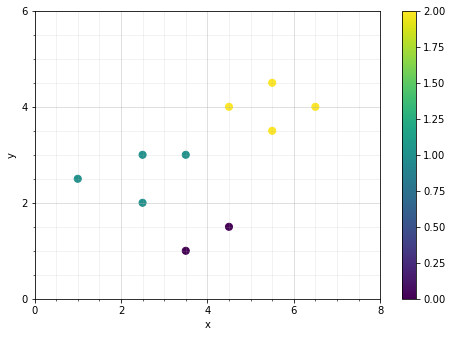

In [7]:
fig = plt.figure()
# ax = fig.add_subplot(111)
ax = fig.add_axes([0,0,1,1])
scatter = ax.scatter(data.x1, data.x2, c=y, s=50)

ax.set_xlabel('x')
ax.set_ylabel('y')

major_ticks = np.arange(0, 9, 2)
minor_ticks = np.arange(0, 9, 0.5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='both')

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.xlim(0, 8)
plt.ylim(0, 6)
plt.colorbar(scatter)

# fig.show()

In [8]:
# k_means = cluster.KMeans(n_clusters=3)
# k_means.fit(data)
# y_pred = k_means.predict(data)

In [9]:
# prediction = pd.concat([data, pd.DataFrame(y_pred, columns=['pred'])], axis = 1)

In [10]:
# prediction

In [11]:
clus0 = data.loc[data.y == 0]  
clus1 = data.loc[data.y == 1]  
clus2 = data.loc[data.y == 2]  

In [12]:
k_list = [clus0.values, clus1.values,clus2.values]

In [13]:
k_list

[array([[3.5, 1. , 0. ],
        [4.5, 1.5, 0. ]]),
 array([[2.5, 2. , 1. ],
        [1. , 2.5, 1. ],
        [2.5, 3. , 1. ],
        [3.5, 3. , 1. ]]),
 array([[5.5, 3.5, 2. ],
        [4.5, 4. , 2. ],
        [6.5, 4. , 2. ],
        [5.5, 4.5, 2. ]])]

In [14]:
def inter_cluster_distance(ck, cl):
    values = np.ones([len(ck), len(cl)])
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i] - cl[j])
    return np.min(values)

In [15]:
inter_cluster_distance(clus0.values, clus1.values)

1.7320508075688772

In [16]:
def intra_cluster_distance(ci):
    values = np.zeros([len(ci), len(ci)])
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i] - ci[j])
    return np.max(values)

In [17]:
intra_cluster_distance(clus0.values)

1.118033988749895

In [42]:
def dunn(k_list):
    inter_s = np.ones([len(k_list), len(k_list)])
    intra_s = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k] + l_range[k + 1:]):
            inter_s[k, l] = inter_cluster_distance(k_list[k], k_list[l])
            intra_s[k] = intra_cluster_distance(k_list[k])
            di = np.min(inter_s) / np.max(intra_s)
    
    return di

In [43]:
dunn(k_list)

0.14867620697065728